In [1]:
%matplotlib ipympl

from wavesongs.utils.paths import ProjDirs
from wavesongs.objects.song import Song
from wavesongs.objects.syllable import Syllable
from wavesongs.utils import plots
from wavesongs.utils.tools import get_positions


# - donwload data from xeno canto
# - rois maad
# - change FF parametrization 

Image save at assets/result/imgs/574179401 - Zonotrichia Capensis-Song.png


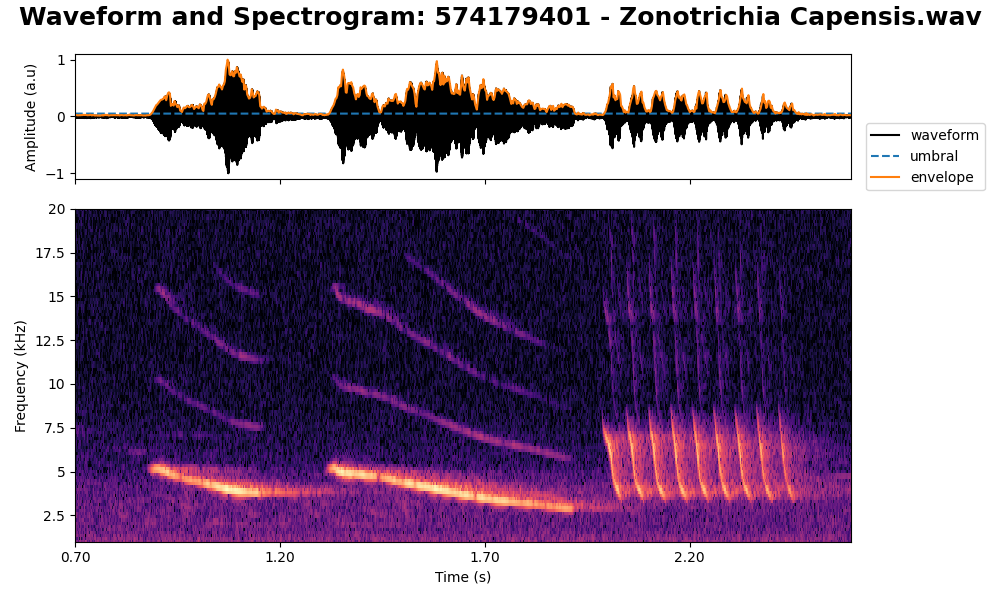

In [2]:
proj_dirs = ProjDirs()
song_copeton = Song(proj_dirs, "574179401", tlim=(0.7,2.6))
song_copeton.acoustical_features(umbral_FF=1.4, NN=256)

klicker_times = plots.spectrogram_waveform(song_copeton, #tlim=(4.9,7.1), #figsize=(9,5),
                                           select_time=True, show=True, save=True)
# song_copeton.play()

In [5]:
data = get_positions(klicker_times)
tlim, flim = data[0] # first pair, index = 0 
t0 = tlim[0] + song_copeton.t0_bs
tend = tlim[1] + song_copeton.t0_bs
print(f"Initial time: {t0:.4f} s. Final time {tend:.4f} s")

Initial time: 1.3271 s. Final time 1.9153 s


Image save at assets/result/imgs/574179401 - Zonotrichia Capensis-0


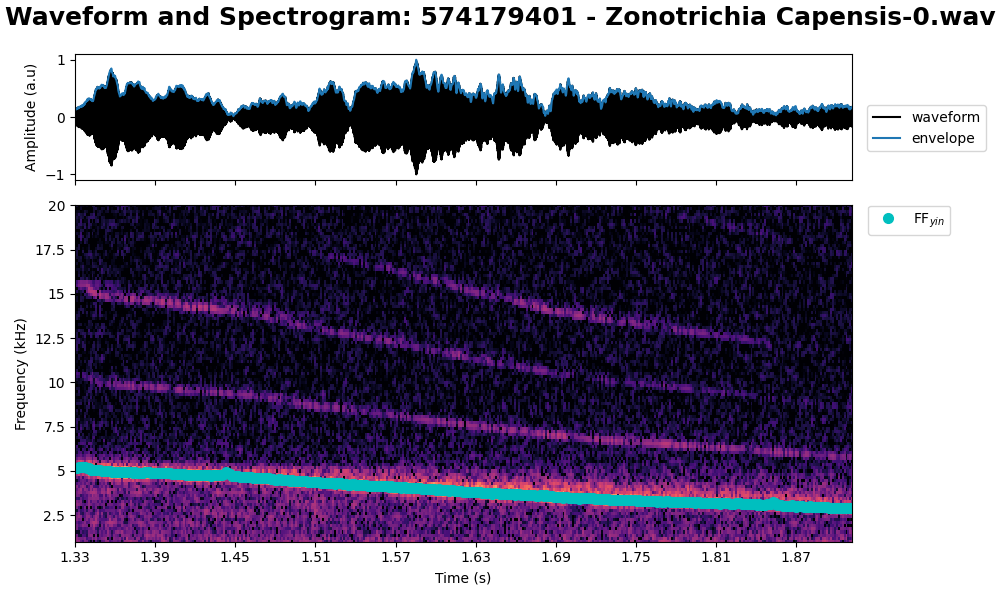

In [5]:
tlim = (1.3271-song_copeton.t0_bs, 1.9153-song_copeton.t0_bs)
copeton_1 = Syllable(obj=song_copeton, tlim=tlim)
copeton_1.acoustical_features(NN=256)
plots.spectrogram_waveform(copeton_1, ff_on=True, select_time=False, show=True, save=True)

In [ ]:
from wavesongs.model import optimizer as optz

opt_z = optz.optimal_params(syllable=copeton_1, Ns=10)
opt_z


Computing a0*...
Optimization terminated successfully.
         Current function value: 0.004970
         Iterations: 1
         Function evaluations: 2
	 Optimal values: a_0=0.0010, t=0.96 min

Computing b0*, b1*, and b2*...


In [ ]:
synth_copeton_1 = copeton_1.solve(z=opt_z)
plots.scores(copeton_1, synth_copeton_1, show=True)
# plots.spectrogram_waveform(synth_copeton_1, ff_on=True, select_time=False, show=True, save=False)
# plots.syllables(copeton_1, synth_copeton_1, ff_on=True)

In [ ]:
plots.alpha_beta(synth_copeton_1)
# synth_copeton_1.z

In [8]:
# plots.scores(copeton_1, synth_copeton_1, show=False)

In [9]:
# from model import optimizer as optz
# args = tuple(copeton_1.params.values()) + (copeton_1,)
# optz.residual_sci_a0([2], *args)
# # optz.residual_ff_b1([2], *args)

Computing a0*...
Optimization terminated successfully.
         Current function value: 0.007774
         Iterations: 6
         Function evaluations: 13
         Optimal values: a_0=-0.0005, t=4.22 min

Computing b0*, b1*, and b2*...
/home/saguileran/anaconda3/envs/wavesongs/lib/python3.12/site-packages/librosa/core/spectrum.py:799: RuntimeWarning: divide by zero encountered in divide
  correction = -np.imag(S_dh / S_h)
/home/saguileran/anaconda3/envs/wavesongs/lib/python3.12/site-packages/librosa/core/spectrum.py:973: RuntimeWarning: divide by zero encountered in divide
  correction = np.real(S_th / S_h)
Optimization terminated successfully.
         Current function value: 0.000647
         Iterations: 41
         Function evaluations: 77
         Optimal values: b_0=0.0024, b_2={b2:.4f}, t={tdiff:.2f} min
Optimization terminated successfully.
         Current function value: 0.000647
         Iterations: 5
         Function evaluations: 10
         Optimal values: b_1=-0.0004, t=4.29 min

Time of execution: 240.1758 min

In [ ]:
# opt_z_gen = optz.optimal_params_general(copeton_1, _params, Ns=10, full_output=True, disp=True)
# opt_z_gen
opt_z

In [ ]:
synth_copeton_1_opt = copeton_1.solve(z=opt_z, params=copeton_1.params)
plots.syllables(copeton_1, synth_copeton_1_opt)
synth_copeton_1_opt.play()

In [ ]:
plots.alpha_beta(synth_copeton_1_opt)

In [ ]:
synth_copeton_1_opt.deltaFF

In [ ]:
import matplotlib.pylab as plt 

plt.close()
plt.plot(synth_copeton_1_opt.beta)
plt.show()

In [ ]:
proj_dirs = ProjDirs(root="../", audios="audios")

copeton_1 = Syllable(file_id="418099511", proj_dirs=proj_dirs, tlim=(0.5,2.0))
copeton_1.acoustical_features(umbral_FF=1.2)
plots.spectrogram_waveform(copeton_1, ff_on=False, select_time=False, show=True, save=False)

In [ ]:
copeton_1.ff_method

In [ ]:
from scipy.optimize import root, fsolve

def y(x, *params):
  return params[0] + params[1]*x + params[2]**x**2

sol = root(y, [-10,10], args=(1,3,2), method='hybr', jac=None, tol=0.0001, callback=None, options=None)
sol.x

# sol = root_scalar(y, args=(1,3,2), method=None, bracket=None, fprime=None, fprime2=None, x0=20, x1=None, xtol=None, rtol=None, maxiter=None, options=None)
# fsolve(y, [-10,1], args=(1,3,2), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)


In [ ]:
bmax = synth_copeton_1.beta.max()
bmin = synth_copeton_1.beta.min()
alpha_max = 0.3
beta_min = 0
beta_max = 0.8

root(y, [-10,10], args=(params["b0"]-beta_min,params["b1"], params["b2"]),
                        method='hybr', jac=None, tol=0.0001, callback=None, options=None)